In [25]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
#Datasets
path = "./datasets/accepted_2007_to_2018Q4.csv"
dataset_accept = pd.read_csv(path)

/var/folders/v0/9xd212bx5wq454d4gnddf1rm0000gn/T/ipykernel_80349/4056628032.py:3: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_accept = pd.read_csv(path)


In [98]:
limitPer = len(dataset) * .70
dataset = dataset_accept.dropna(thresh=limitPer, axis=1)


In [99]:
dataset["loan_status"].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [100]:
dataset = dataset[(dataset["loan_status"] == "Fully Paid") | (dataset["loan_status"] == "Charged Off")]
dataset.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object', length=108)

In [105]:
#Top 5 columns with highest count of 0 rows
dataset[dataset == 0].count(axis=0).sort_values(ascending = False).head(5)

delinq_amnt                   1340311
acc_now_delinq                1338972
chargeoff_within_12_mths      1334414
collections_12_mths_ex_med    1324213
tax_liens                     1301991
dtype: int64

In [106]:
#remove rows with more than 70% of 0 values
dataset = dataset.loc[:, 0.7 > (dataset==0).mean()]

In [119]:
#drop columns unnecessary for the model
dataset = dataset.drop(["id","url"], axis = 1)

In [124]:
dataset["term_in_months"] = dataset["term"].str.extract('(\d+)')
dataset["emp_length_in_years"] = dataset["emp_length"].str.extract('(\d+)')

In [126]:
dataset = dataset.drop(["term", "emp_length"], axis = 1)

<Axes: >

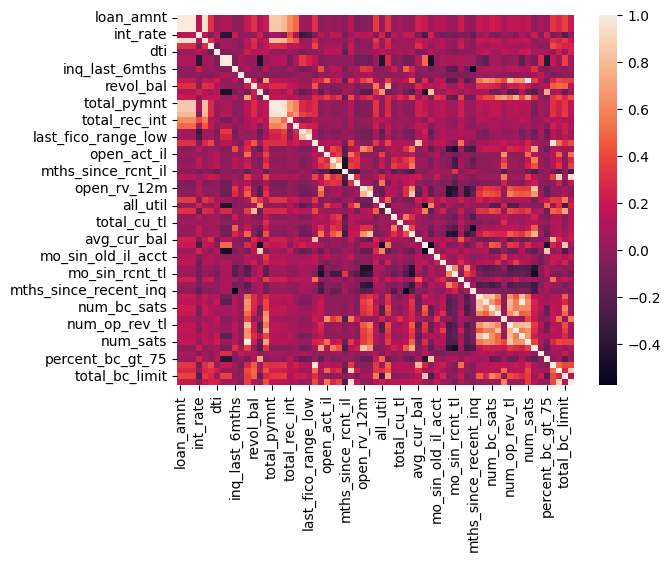

In [130]:
numeric_data = dataset.select_dtypes(include='number')
sns.heatmap(numeric_data.corr())
